## Computer Vision Series 3: Base Operation of Image in OpenCV with Python

The main code comes from the documentation of opencv and  the book, learning opencv3 computer vision with python, 2nd Edition.

In [1]:
import cv2
import numpy as np
from scipy import ndimage
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
print cv2.__version__

3.1.0


## Low Pass Filter (LPF)

A low pass filter (LPF) will smoothen the pixel if the difference with the surrounding pixels is lower than a certain threshold. 
This is used in denoising and blurring.
OpenCV provides mainly four types of blurring techniques.

- Average blurring is the simplest method.
- Gaussian blurring is highly effective in removing **gaussian noise** from the image.
- Median blurring is highly effective against **salt-and-pepper noise** in the images.
- Bilateral Filtering is highly effective in **noise removal while keeping edges sharp**. But the operation is slower compared to other filters. 

## High Pass Filter (HPF)

A filter that examines a region of an image and boosts the intensity of certain pixels based on the difference in the intensity with the surrounding pixels.

If a pixel stands out from the surrounding pixels, it will get boosted.

This is particularly effective in edge detection.

We apply two HPFs with the two convolution kernels we defined. 
Lastly, we also implement a differential method of obtaining a HPF by applying a low pass filter and calculating the difference with the original image. 
You will notice that the third method actually yields the best result.

![alt text](6.gif "Title")

In [3]:
kernel_3x3 = np.array([[-1, -1, -1], 
                      [-1, 8, -1], 
                      [-1, -1, -1]])

In [4]:
kernel_5x5 = np.array([[-1, -1, -1, -1, -1], 
                      [-1, 1, 2, 1, -1], 
                      [-1, 2, 4, 2, -1], 
                      [-1, 1, 2, 1, -1], 
                      [-1, -1, -1, -1, -1]])

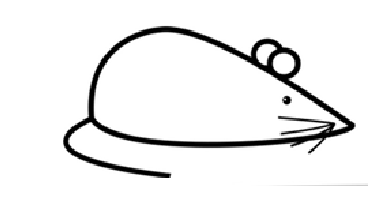

In [5]:
rat = cv2.imread('rat.png', 0)
plt.gray()
plt.imshow(rat)
plt.axis('off');

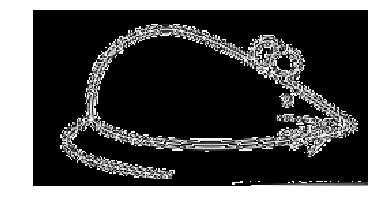

In [6]:
rat_3 = ndimage.convolve(rat, kernel_3x3)
plt.imshow(rat_3)
plt.axis('off');

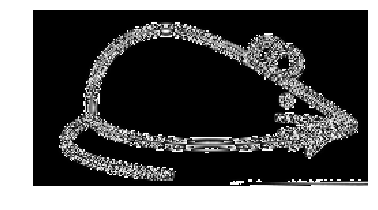

In [7]:
rat_5 = ndimage.convolve(rat, kernel_5x5)
plt.imshow(rat_5)
plt.axis('off');

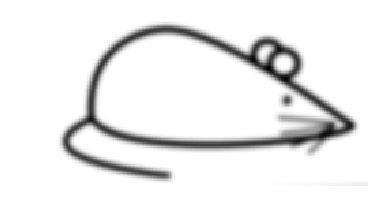

In [8]:
rat_blurred = cv2.GaussianBlur(rat, (11,11), 0)
plt.imshow(rat_blurred)
plt.axis('off');

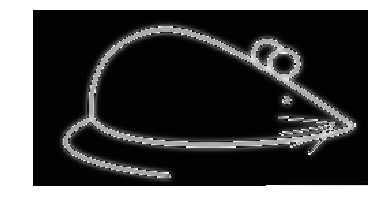

In [9]:
g_hpf = rat - rat_blurred
plt.imshow(g_hpf)
plt.axis('off');

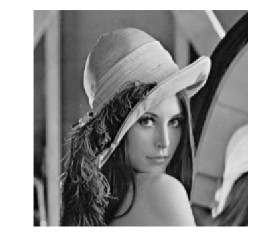

In [10]:
lena = cv2.imread('lena.png', 0)
plt.gray()
plt.imshow(lena)
plt.axis('off');

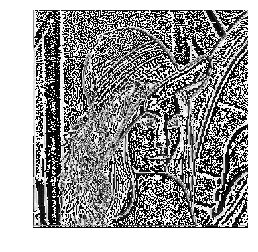

In [11]:
lena_3 = ndimage.convolve(lena, kernel_3x3)
plt.imshow(lena_3)
plt.axis('off');

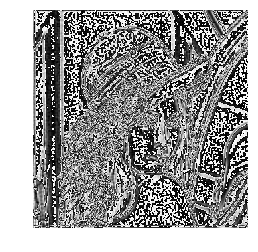

In [12]:
lena_5 = ndimage.convolve(lena, kernel_5x5)
plt.imshow(lena_5)
plt.axis('off');

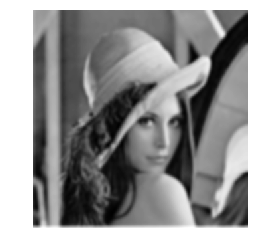

In [13]:
lena_blurred = cv2.GaussianBlur(lena, (11,11), 0)
plt.imshow(lena_blurred)
plt.axis('off');

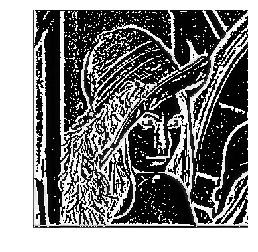

In [14]:
lena_hpf = lena - lena_blurred
plt.imshow(lena_hpf)
plt.axis('off');

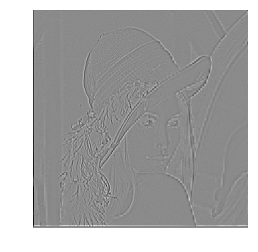

In [15]:
lena_edge = cv2.Laplacian(lena, cv2.CV_64F)
plt.imshow(lena_edge)
plt.axis('off');

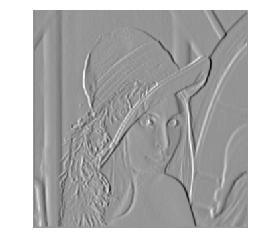

In [16]:
lena_x = cv2.Sobel(lena, cv2.CV_16S,1,0)  
plt.imshow(lena_x)
plt.axis('off');

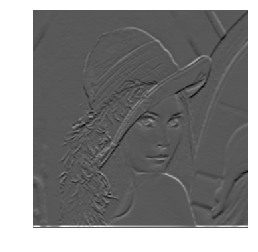

In [17]:
lena_y = cv2.Sobel(lena, cv2.CV_16S,0,1)  
plt.imshow(lena_y)
plt.axis('off');

## Edge Detection

It is a multi-stage algorithm and we will go through each stages.

- Noise Reduction. 
  Since edge detection is susceptible to noise in the image, first step is to remove the noise in the image with a 5x5 Gaussian filter. 
- Finding Intensity Gradient of the Image
  Smoothened image is then filtered with a Sobel kernel in both horizontal and vertical direction to get first derivative in horizontal direction ( Gx) and vertical direction ( Gy). From these two images, we can find edge gradient and direction for each pixel.
- Non-maximum Suppression
  A full scan of image is done to remove any unwanted pixels which may not constitute the edge. For this, at every pixel, pixel is checked if it is a local maximum in its neighborhood in the direction of gradient. 
- Hysteresis Thresholding
  This stage decides which are all edges are really edges and which are not. For this, we need two threshold values, minVal and maxVal. Any edges with intensity gradient more than maxVal are sure to be edges and those below minVal are sure to be non-edges, so discarded. Those who lie between these two thresholds are classified edges or non-edges based on their connectivity. If they are connected to "sure-edge" pixels, they are considered to be part of edges. Otherwise, they are also discarded. 

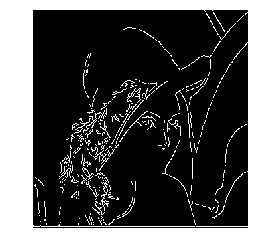

In [18]:
lena_edge = cv2.Canny(lena, 100, 300)
plt.imshow(lena_edge)
plt.axis('off');

## Example for Erode

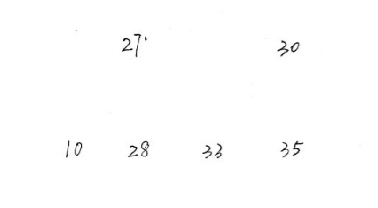

In [19]:
page = cv2.imread('page.PNG', 0)  
plt.gray()
plt.imshow(page)
plt.axis('off');

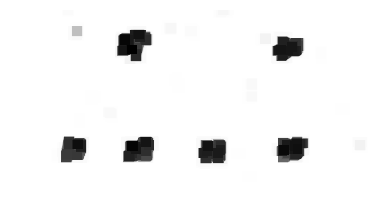

In [20]:
fushi = cv2.erode(page,None,iterations=5) 
plt.imshow(fushi)
plt.axis('off');

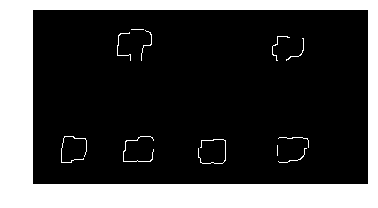

In [21]:
thresh = cv2.Canny(fushi, 300, 550)
cv2.imwrite('D:\\thresh.jpg', thresh)
plt.imshow(thresh)
plt.axis('off');

[(186, 145, 32, 28), (275, 143, 36, 29), (102, 142, 35, 29), (32, 142, 29, 30), (270, 29, 36, 29), (95, 21, 39, 37)]
6


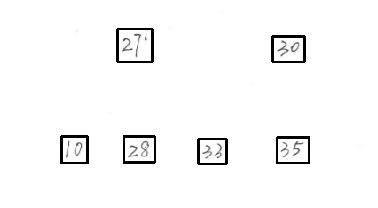

In [22]:
rois = []  
im2,contours,hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
for cnt in contours:  
    x,y,w,h = cv2.boundingRect(cnt)
    if w > 6 and h > 8:  
        cv2.rectangle(page,(x,y),(x+w,y+h),(0,255,0),2)
        rois.append((x,y,w,h))  
    #cv2.rectangle(page,(x,y),(x+w,y+h),(0,255,0),2)
    #rois.append((x,y,w,h))    
cv2.imwrite('D:\\out_test.jpg', page)
plt.imshow(page)
plt.axis('off');
print rois
print len(rois)

In [23]:
double_digit = [page[y:(y+h), x:(x+w)] for x, y, w, h in rois]

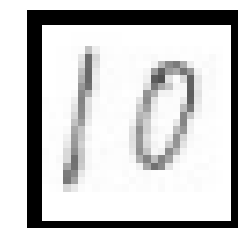

In [24]:
plt.gray()
plt.imshow(double_digit[3])
plt.axis('off');

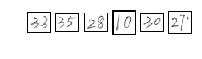

In [25]:
for i in range(1, 7):
    plt.subplot(1, 12, i)
    plt.imshow(double_digit[i - 1])
    plt.axis('off');

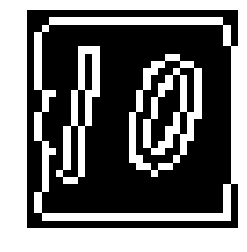

In [26]:
thresh = cv2.Canny(double_digit[3], 0, 100)
#cv2.imwrite('D:\\thresh.jpg', thresh)
plt.imshow(thresh)
plt.axis('off');

[(14, 6, 10, 17), (4, 5, 6, 19), (1, 1, 27, 28)]
3


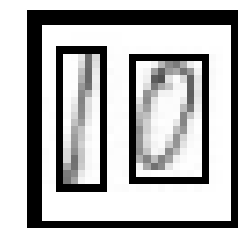

In [27]:
rois_d = []  
out = double_digit[3].copy()
im2,contours,hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
for cnt in contours:  
    x,y,w,h = cv2.boundingRect(cnt)
    if w > 1 and h > 1:  
        cv2.rectangle(out,(x,y),(x+w,y+h),(0,255,0),1)
        rois_d.append((x,y,w,h))    
#cv2.imwrite('D:\\out_test.jpg', out)
plt.imshow(out)
plt.axis('off');
print rois_d
print len(rois_d)

## Example for Dilate

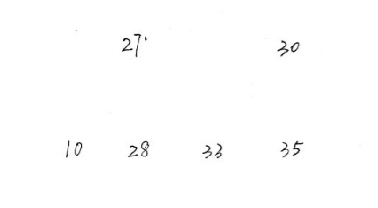

In [28]:
page = cv2.imread('page.PNG', 0)  
plt.gray()
plt.imshow(page)
plt.axis('off');

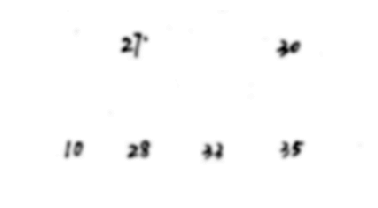

In [29]:
page_blurred = cv2.GaussianBlur(page, (11,11), 0)
plt.imshow(page_blurred)
plt.axis('off');

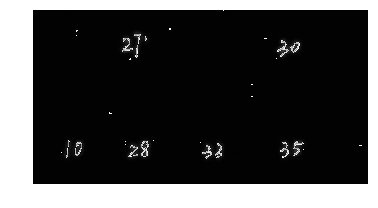

In [30]:
g_hpf = page - page_blurred
plt.imshow(g_hpf)
plt.axis('off');

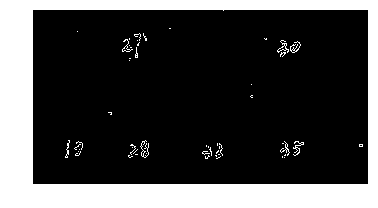

In [31]:
thresh = cv2.Canny(g_hpf, 50, 700)
cv2.imwrite('D:\\thresh.jpg', thresh)
plt.imshow(thresh)
plt.axis('off');

[(194, 154, 8, 14), (107, 151, 10, 16), (207, 150, 7, 18), (293, 148, 13, 17), (279, 148, 11, 19), (46, 148, 10, 14), (121, 147, 10, 20), (290, 35, 12, 14), (275, 34, 14, 19), (100, 31, 13, 16), (114, 26, 8, 9)]
11


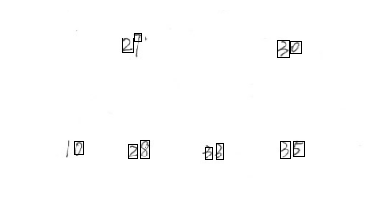

In [32]:
rois = []  
out = page.copy()
im2,contours,hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
for cnt in contours:  
    x,y,w,h = cv2.boundingRect(cnt)
    if w > 6 and h > 8:  
        cv2.rectangle(out,(x,y),(x+w,y+h),(0,255,0),1)
        rois.append((x,y,w,h))  
    #cv2.rectangle(page,(x,y),(x+w,y+h),(0,255,0),2)
    #rois.append((x,y,w,h))    
cv2.imwrite('D:\\out_test.jpg', out)
plt.imshow(out)
plt.axis('off');
print rois
print len(rois)

## Geometric Transformations of Images

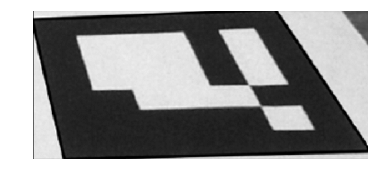

In [33]:
warp = cv2.imread('warp.PNG', 0)  
plt.gray()
plt.imshow(warp)
plt.axis('off');

In [34]:
rows,cols = warp.shape
print warp.shape

(267L, 604L)


### Scaling

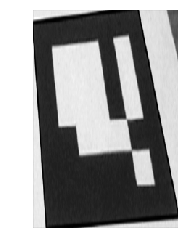

In [35]:
plt.imshow(cv2.resize(warp, (200, 300)))
plt.axis('off');

### Translation

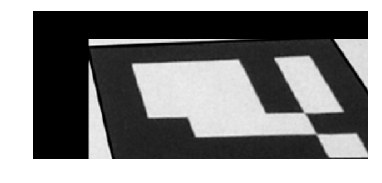

In [36]:
plt.imshow(cv2.warpAffine(warp, np.float32([[1,0,100],[0,1,50]]), (cols, rows)))
plt.axis('off');

### Rotation

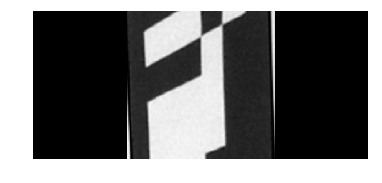

In [37]:
M = cv2.getRotationMatrix2D((cols/2,rows/2),90,1)
plt.imshow(cv2.warpAffine(warp, M, (cols,rows)))
plt.axis('off');